### Librerías

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD

In [22]:
tf.config.set_visible_devices([], 'GPU')

# if tf.test.gpu_device_name(): # this lies and tells you about all devices
if tf.config.experimental.list_logical_devices('GPU'):
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## Constantes

In [23]:
PATH = "../../"

In [24]:
MODEL_NAME = "MobileNetV2"

In [25]:
TARGET_IMG_WIDTH = 224
TARGET_IMG_HEIGHT = 224
TARGET_IMG_CHANNELS = 3
TARGET_SIZE = (TARGET_IMG_WIDTH, TARGET_IMG_HEIGHT)
TARGET_SHAPE = (TARGET_IMG_WIDTH, TARGET_IMG_HEIGHT, TARGET_IMG_CHANNELS)

OPTIMIZER = Adam()
LOSS = tf.keras.losses.SparseCategoricalCrossentropy()

# METRICS = [tf.keras.metrics.Accuracy, tf.keras.metrics.Precision, tf.keras.metrics.Recall]
METRICS = ['accuracy']
# METRICS = ['accuracy', 'loss', 'precision', 'recall', 'f1_score', 'auc_roc', 'sensitivity', 'specificity', 'top_k_accuracy']

### Modelo

In [26]:
# Cargar el modelo entrenado
best_model_path = PATH + "Models/" + MODEL_NAME + "/best_model_20230703_1624_val_acc_0.5863.h5"
best_model = load_model(best_model_path)

In [27]:
directorio_csv = PATH + "CSVs/dataset/test.csv"

# Cargar el CSV en un DataFrame de pandas
df = pd.read_csv(directorio_csv)

### Funciones auxiliares

In [51]:
# Función para preprocesar la imagen
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, TARGET_SIZE)
    image = image.astype("float32") / 255.0
    return image

# Función para mostrar un gráfico con imágenes aleatorias y sus predicciones
def plot_images(images, true_labels, predicted_labels, accuracies):
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.flatten()

    for i in range(16):
        axes[i].imshow(images[i])
        axes[i].axis("off")

        true_label = true_labels[i]
        predicted_label = predicted_labels[i]
        accuracy = accuracies[i]

        if true_label == predicted_label:
            color = "green"
        else:
            color = "red"

        axes[i].set_title(f"True: {true_label}\nPredicted: {predicted_label}\nAccuracy: {accuracy:.2f}", color=color)

    plt.tight_layout()
    plt.show()

def calculate_accuracy(true_labels, predicted_labels):
    accuracy = np.mean(np.array(true_labels) == np.array(predicted_labels))
    return accuracy

def calculate_loss(true_labels, predicted_probabilities):
    loss = tf.keras.losses.sparse_categorical_crossentropy(true_labels, predicted_probabilities, from_logits=False)
    loss = np.mean(loss)
    return loss

In [29]:
# Lista para almacenar las imágenes aleatorias y sus predicciones
random_images = []
true_labels = []
predicted_labels = []
accuracies = []

In [30]:
CLASSES = ['caballo', 'ciervo', 'gamo', 'humano', 'jabali', 'vaca', 'vacia', 'zorro']

In [31]:
# Iterar sobre las filas del DataFrame y realizar la predicción
for index, row in df.iterrows():
    # Obtener el directorio de la imagen
    directorio_imagen = PATH + "Dataset/" + row["path"]

    # Cargar la imagen
    imagen = cv2.imread(directorio_imagen)

    # Preprocesar la imagen
    imagen_preprocesada = preprocess_image(imagen)

    # Realizar la predicción
    prediccion = best_model.predict(np.expand_dims(imagen_preprocesada, axis=0))
    clase_predicha = np.argmax(prediccion)
    accuracy_prediccion = prediccion[0, clase_predicha]

    # Almacenar las imágenes y sus predicciones
    random_images.append(imagen_preprocesada)
    true_labels.append(row["class"])
    predicted_labels.append(CLASSES[clase_predicha])
    accuracies.append(accuracy_prediccion)

1/1 [==============================] - 0s 50ms/step


In [50]:
accuracy = calculate_accuracy(true_labels, predicted_labels)
print("Accuracy:", accuracy)

#loss = calculate_loss(true_labels, predicted_probabilities)
#print("Loss:", loss)

Accuracy: 0.6896120150187734


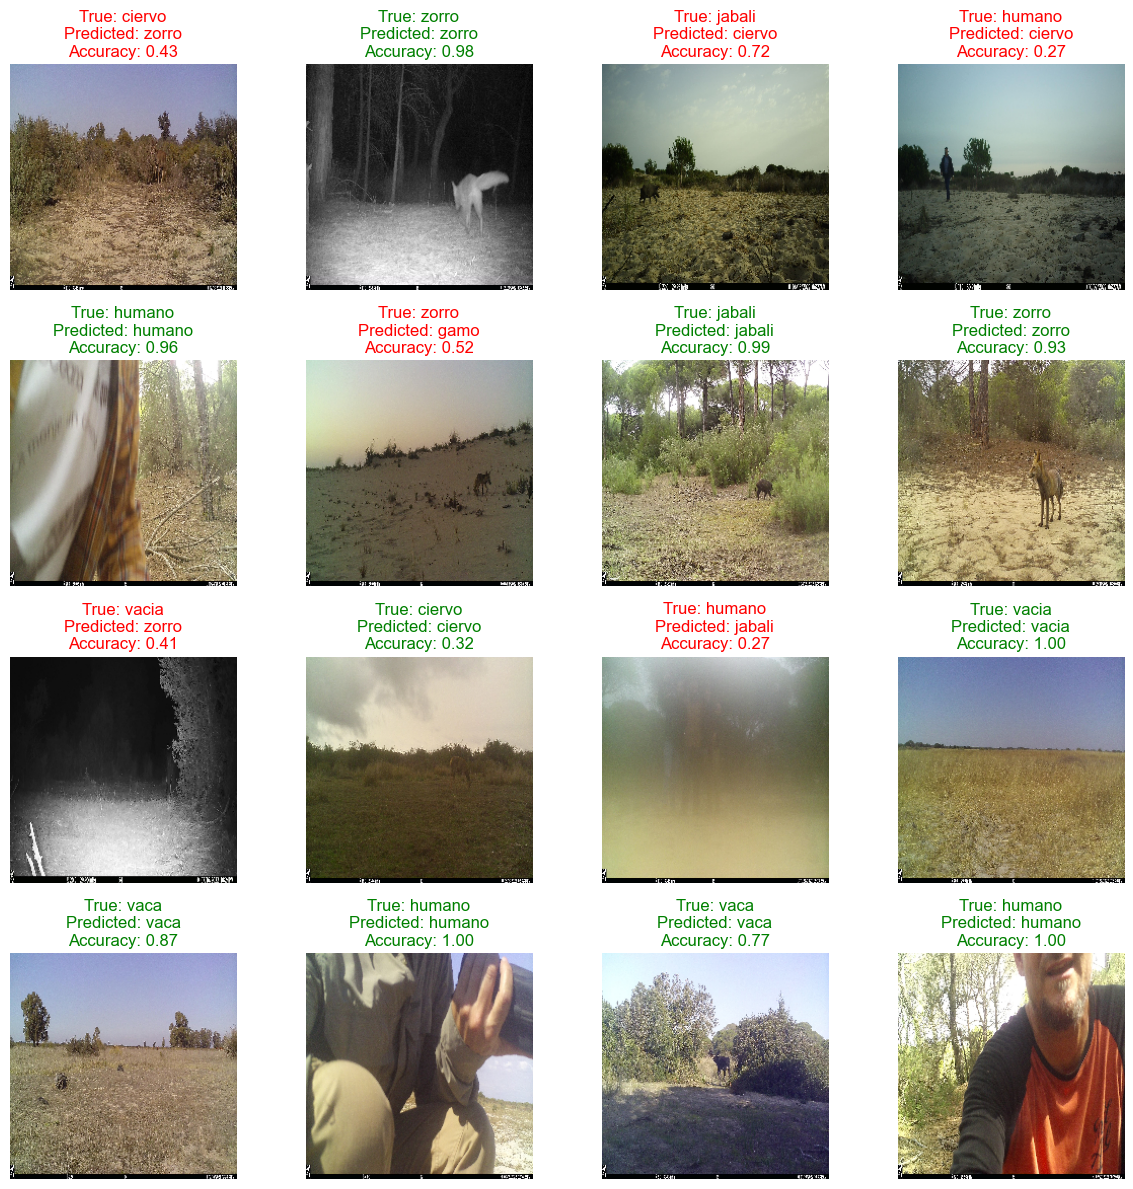

In [52]:
# Mostrar un gráfico con imágenes aleatorias y sus predicciones
random_indices = random.sample(range(len(df)), 16)
plot_images([random_images[i] for i in random_indices],
            [true_labels[i] for i in random_indices],
            [predicted_labels[i] for i in random_indices],
            [accuracies[i] for i in random_indices])

[725, 569, 55, 245, 346, 22, 418, 710, 533, 604, 611, 170, 791, 573, 291, 626, 360, 526, 159, 731]


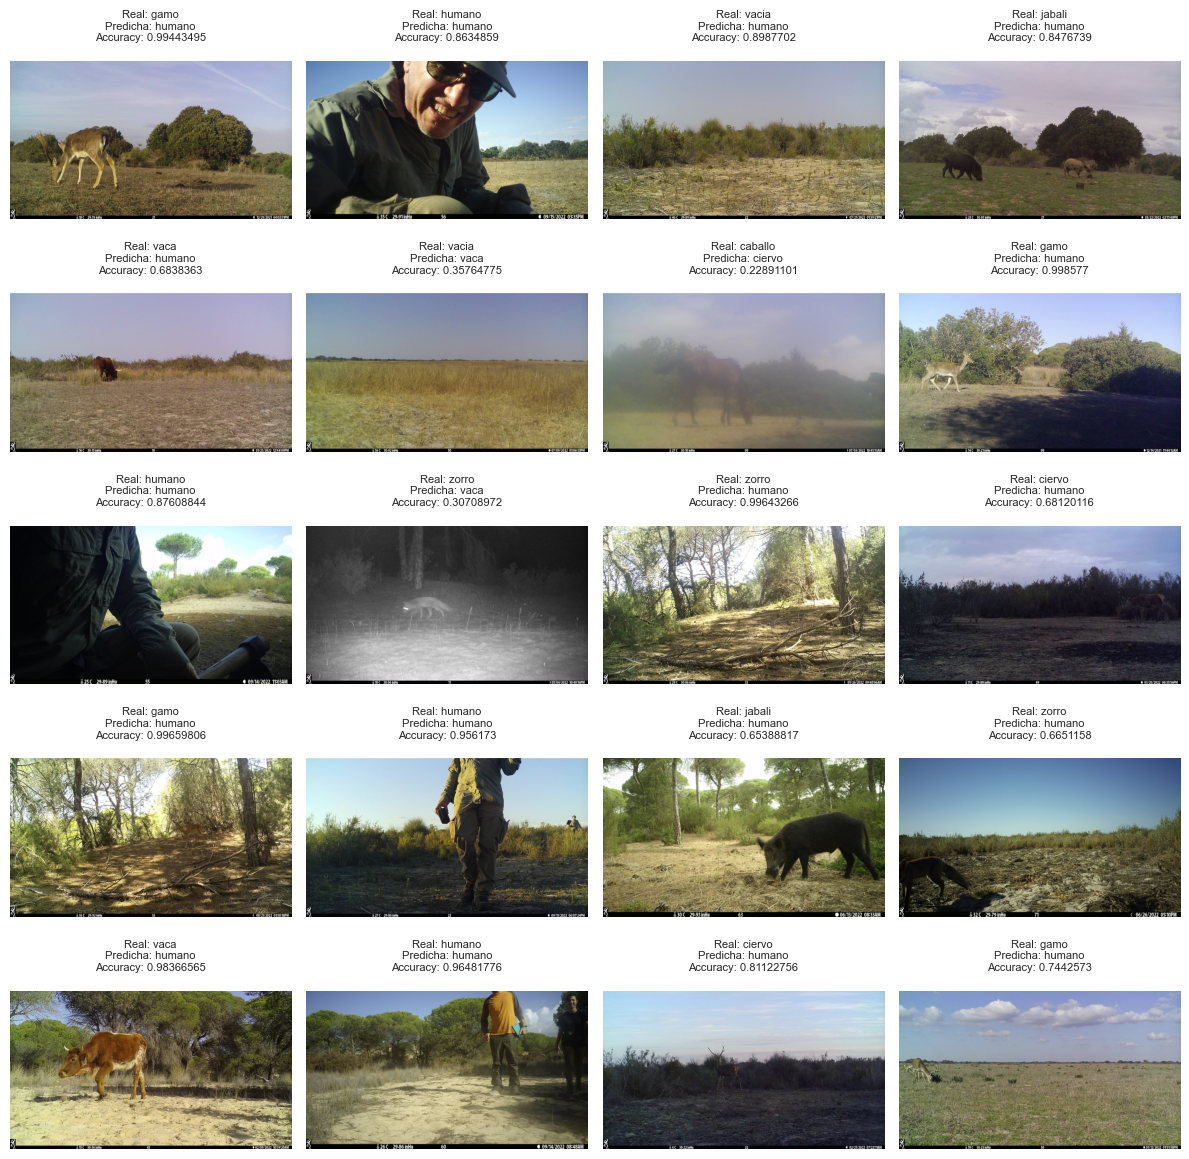

In [13]:
'''import random

# Calcular accuracy y loss
# Obtener 20 índices aleatorios para mostrar imágenes
indices_aleatorios = random.sample(range(len(df)), 20)

print(indices_aleatorios)

# Crear el subplot para mostrar las 20 imágenes
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 12))

# Iterar sobre los índices aleatorios y mostrar las imágenes con el título correspondiente
for i, ax in enumerate(axes.flatten()):
    # Obtener el índice aleatorio y la información de la imagen
    indice = indices_aleatorios[i]
    imagen_info = df.iloc[indice]

    # Obtener la ruta de la imagen y cargarla
    directorio_imagen = PATH + "Dataset/" + imagen_info["path"]


    imagen = cv2.imread(directorio_imagen)
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Realizar la predicción
    # prediccion = best_model.predict(imagen_preprocesada)
    clase_predicha = np.argmax(prediccion)

    # Realizar la predicción
    # prediccion = best_model.predict(imagen_preprocesada)
    clase_predicha = etiquetas_predichas[indice]

    # Calcular el accuracy de la etiqueta predicha
    acc_prediccion = accuracy_prediccion[indice]

    # Mostrar la imagen en el subplot con el título correspondiente
    ax.imshow(imagen)
    ax.axis('off')
    ax.set_title("Real: " + str(imagen_info['class']) + "\n" +
                 "Predicha: " + str(clase_predicha) + "\n" +
                 "Accuracy: " + str(acc_prediccion) + "\n"
                 , fontsize=8)

plt.tight_layout()
plt.show()'''